## Purpose: Model Comparison

Demonstration: 
    1. Parameter fit
    2. Use of Evidence

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from PolynomialModel import PolynomialModel
from Fitter import Fitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

y = ym + sig * numpy.random.randn( N )


define the fitter: Fitter

Polynomial degree  0   blue
Fit params           3.265
    stdev            0.816
    chisq          279.953
    evidence       -29.688
Polynomial degree  1   green
Fit params       [    2.193    2.145]
    stdev        [    0.403    0.253]
    chisq           58.498
    evidence       -25.404
Polynomial degree  2   red
Fit params       [    0.706    1.417    0.728]
    stdev        [    0.259    0.147    0.087]
    chisq           12.057
    evidence       -21.866
Polynomial degree  3   mint
Fit params       [    1.247    0.476    0.308    0.280]
    stdev        [    0.033    0.030    0.015    0.007]
    chisq            0.145
    evidence        -8.626
Polynomial degree  4   magenta
Fit params       [    1.256    0.496    0.292    0.273    0.004]
    stdev        [    0.036    0.044    0.030    0.014    0.006]
    chisq            0.141
    evidence       -12.690
Polynomial degree  5   yellow
Fit params       [    1.260    0.491    0.283    0.277    0.006   -0.001]
    stdev        

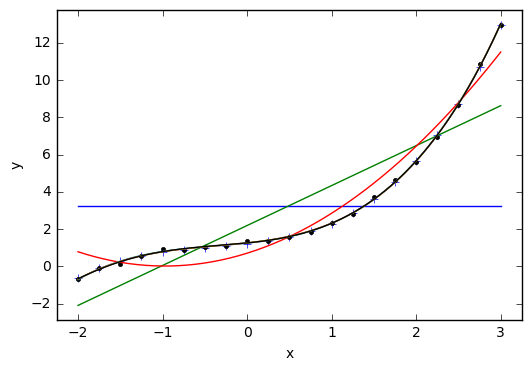

In [4]:
plotFit( x, y, truth=ym, show=False )
yy = numpy.zeros( 7, dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
for deg in range( 7 ) :
    poly = PolynomialModel( deg )
    np = poly.getNumberOfParameters()
    fitter = Fitter( x, poly )
    param = fitter.fit( y )
    plt.plot( xi, poly( xi ) )

    chisq = fitter.chisq
    stdev = fitter.stdevs
    logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
    print( "Polynomial degree  %d  " % (np-1), col[deg] )
    print( "Fit params      ", fmt( param, max=None ) )
    print( "    stdev       ", fmt( stdev, max=None ) ) 
    print( "    chisq       ", fmt( chisq ) )
    print( "    evidence    ", fmt( logpr ) )
    yy[deg] = logpr
plt.show()

Plot the evidence as function of the polynomial degree.

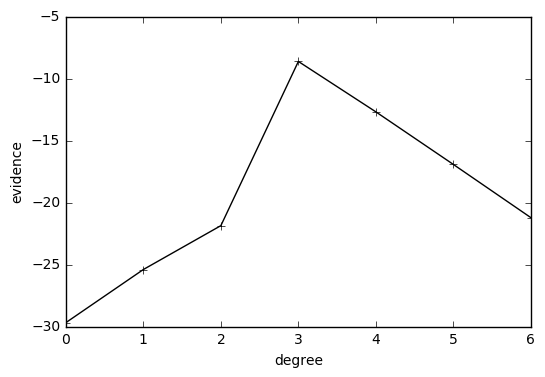

In [5]:
plt.plot( yy, 'k-+' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.show()